# Comparison: pre-train/during-train/after-train

In [ ]:
from PIL import Image 
def load_image(image_path, data_transform=None):
    image=Image.open(open(image_path,'rb'))
    if data_transform is not None:
        image =data_transform(image).unsqueeze(0)
    return image

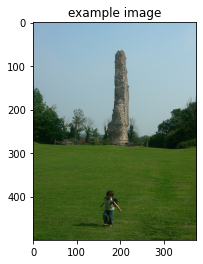

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


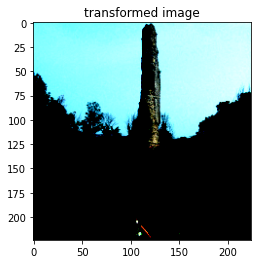

bears skyline bears skyline riding bears skyline riding rooftop executes tub clown supplies ice bars driven snack easter ancient
15                     a little girl running in a field
16    a little girl walking on the green grass in fr...
17    a small child is in a grassy field near an old...
18    a small child running along the grass with a l...
19    a young child walks on the grass away from a s...
Name: caption, dtype: object


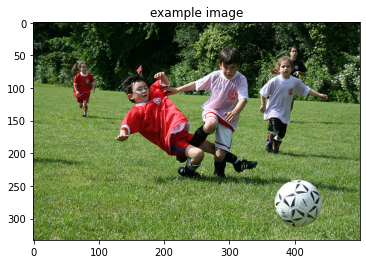

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


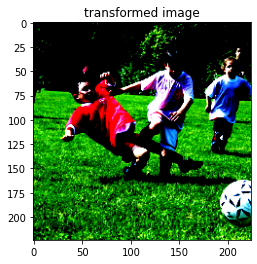

capes crawls arch pooh wild eyebrows launches hilly around embrace war archway upon snowcovered chairlift crocodile beautiful tongue downhill
50    a kid in red falls as he struggles with a kid ...
51           children chasing the ball in a soccer game
52        little boys running and chasing a soccer ball
53    the boy with the red soccer suit is falling do...
54    two teams of children one in red and the other...
Name: caption, dtype: object


In [ ]:
#pretrain
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import torch 
model_path=F'/drive/My Drive/Colab Notebooks/Flickr8k' 
# model_type = "RNN"  
model_type ="LSTM"

smoothing = SmoothingFunction()

# random.seed(1000)
# aa=random.randrange(0, 20,5)
# n=2
# bb=aa+(n-1)*5
pa_list=[15,50]

with open(vocab_path,'rb') as f:
    vocab=pickle.load(f)

for index in pa_list:
    path_image=test_loader.dataset.df['path'][index]
    re_cap=test_loader.dataset.df['caption'][index:index+5]



    '''
    rerun cell "Initialize the models and set the learning parameters"
    make sure encoder and decoder are clean
    '''
    encoder=encoder.eval()
    encoder=encoder.to(device)
    decoder=decoder.to(device)

    image=load_image(path_image,data_transform)
    image_tensor=image.to(device)
    Score=[]
    
    feature=encoder(image_tensor)
    sampled_ids=decoder.sample(feature)
    sampled_ids=sampled_ids[0].cpu().numpy()

    sampled_predict = []
    for word_id in sampled_ids:
        word = vocab.idx2word[word_id]
        if word =='<start>': 
            continue 
        sampled_predict.append(word)
        if word == '<end>':
            break
    sampled_predict=sampled_predict[:-1]
    sentence = ' '.join(sampled_predict)
    references=[]
        
    for item in re_cap:
        references.append(str(item).split()) 
    Bleu_score=sentence_bleu(references,sampled_predict,weights=(0.45,0.45,0.05,0.05),smoothing_function=smoothing.method2)
    Score.append(Bleu_score)
    
    image_show=Image.open(path_image)
    plt.imshow(np.asarray(image_show))
    plt.title('example image')
    plt.show()
    
    transformed_image=np.asarray(image)
    transformed_image = np.squeeze(transformed_image)
    transformed_image=transformed_image.transpose((1, 2, 0))
    plt.imshow(transformed_image)
    plt.title('transformed image')
    plt.show()
    print(sentence)
    print(re_cap)

In [ ]:
data_df_test['caption'][38430+38]

'people are sitting on a snowy mountain'

a man in a red shirt is standing on a red and white dog
a man in a black and white shirt is standing on a beach
a dog is jumping over a hurdle
a man in a black shirt and a brown dog is standing on a grassy lawn
a man is standing on a bench with a dog
15                     a little girl running in a field
16    a little girl walking on the green grass in fr...
17    a small child is in a grassy field near an old...
18    a small child running along the grass with a l...
19    a young child walks on the grass away from a s...
Name: caption, dtype: object
[0.21427753819164336, 0.23044683062136126, 0.25726832633446894, 0.24173064512277695, 0.24393792832743033]


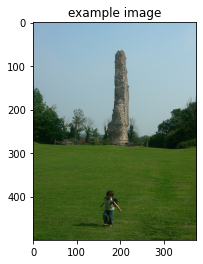

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


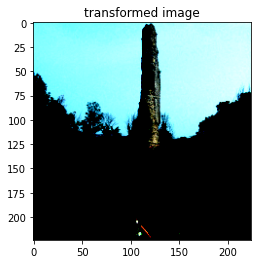

a man in a red shirt is standing on a red and white and white and white and
a boy in a red shirt is playing with a soccer ball
a boy in a red uniform is running on the grass
a boy in a red shirt is running on a field
a boy in a red shirt is playing soccer
50    a kid in red falls as he struggles with a kid ...
51           children chasing the ball in a soccer game
52        little boys running and chasing a soccer ball
53    the boy with the red soccer suit is falling do...
54    two teams of children one in red and the other...
Name: caption, dtype: object
[0.24955346756573785, 0.4666000134759721, 0.46661275004985214, 0.4279183185937986, 0.5676863679673099]


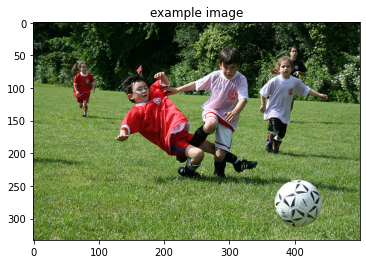

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


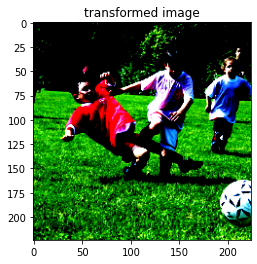

In [ ]:
#dur-train
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import torch 
model_path=F'/drive/My Drive/Colab Notebooks/Flickr8k' 
# model_type = "RNN"  
model_type ="LSTM"

smoothing = SmoothingFunction()

# random.seed(1000)
# aa=random.randrange(0, 20,5)
# n=2
# bb=aa+(n-1)*5
pa_list=[15,50]

with open(vocab_path,'rb') as f:
    vocab=pickle.load(f)

for index in pa_list:
    Score = []
    path_image=test_loader.dataset.df['path'][index]
    re_cap=test_loader.dataset.df['caption'][index:index+5]

    encoder=encoder.eval()
    encoder=encoder.to(device)
    decoder=decoder.to(device)
    image=load_image(path_image,data_transform)
    image_tensor=image.to(device)
    Score=[]

    for epoch in range(5):
        if model_type == "RNN":
#           encoder_path=os.path.join(model_path,'rencoder-{}-{}.ckpt'.format(epoch+1, 230))
          decoder_path=os.path.join(model_path,'rdecoder-{}-{}.ckpt'.format(epoch+1, 230))
        else:
#           encoder_path=os.path.join(model_path,'encoder-{}-{}.ckpt'.format(epoch+1, 140))
          decoder_path=os.path.join(model_path,'decoder-{}-{}.ckpt'.format(epoch+1, 140))


        encoder.load_state_dict(torch.load(encoder_path))
        decoder.load_state_dict(torch.load(decoder_path))
        
        feature=encoder(image_tensor)
        sampled_ids=decoder.sample(feature)
        sampled_ids=sampled_ids[0].cpu().numpy()

        sampled_predict = []
        for word_id in sampled_ids:
            word = vocab.idx2word[word_id]
            if word =='<start>': 
                continue 
            sampled_predict.append(word)
            if word == '<end>':
                break
        sampled_predict=sampled_predict[:-1] #remove <end> 
        sentence = ' '.join(sampled_predict)
        references=[]
            
        for item in re_cap:
            references.append(str(item).split()) 

        Bleu_score=sentence_bleu(references,sampled_predict,weights=(0.45,0.45,0.05,0.05),smoothing_function=smoothing.method2)
        Score.append(Bleu_score)
        print(sentence)

   
    print(re_cap)
    print(Score)
    image_show=Image.open(path_image)
    plt.imshow(np.asarray(image_show))
    plt.title('example image')
    plt.show()

    transformed_image=np.asarray(image)
    transformed_image = np.squeeze(transformed_image)
    transformed_image=transformed_image.transpose((1, 2, 0))
    plt.imshow(transformed_image)
    plt.title('transformed image')
    plt.show()
    

0.3302273429188349
a child is sitting on a red couch
125      a boy in an orange jacket through a play tunnel
126                          a boy slides through a tube
127             a smiling child slides down a tube slide
128    a young boy wearing a red coat is playing in a...
129                smiling boy in tube had toward camera
Name: caption, dtype: object


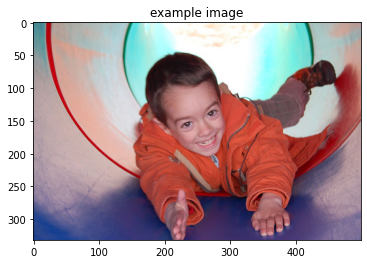

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


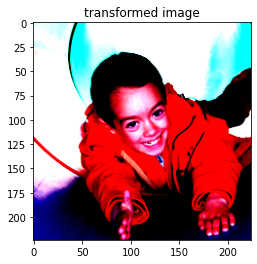

0.5624707225317666
a man in a red jacket is standing on a rock
245    a climber stops to take a drink while climbing...
246               a man holding a cup on a snow mountain
247    a man in a yellow suit is holding up a cup whi...
248                 a mountain climber stops for a drink
249    a mountaineer in a yellow jacket is drinking f...
Name: caption, dtype: object


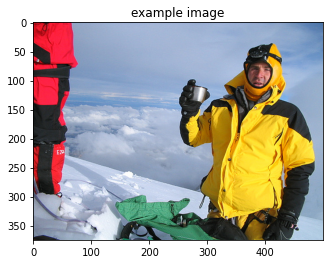

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


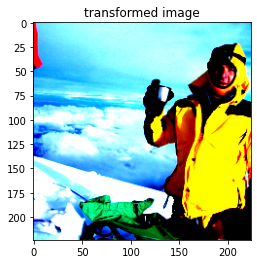

0.16556045130478725
a boy and girl are sitting on a red scooter
370    a group of kids plays in the spray of water fr...
371               children are being splashed with water
372           children are playing outside in a fountain
373    five children are being sprayed by a water fou...
374        four children are playing in a water fountain
Name: caption, dtype: object


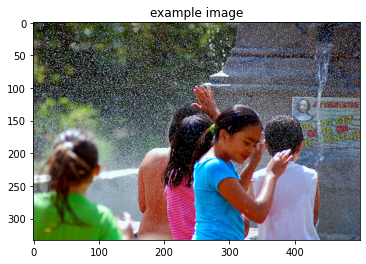

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


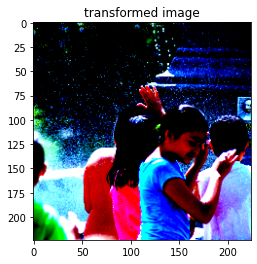

0.12349339879278551
a boy in a bathing suit is sitting in a swimming pool
375        a man and two boys standing in spraying water
376    a shirtless male looks to his right while wate...
377    two boys in swimsuits standing under running w...
378                            two boys playing in water
379                 young boys enjoying a spray of water
Name: caption, dtype: object


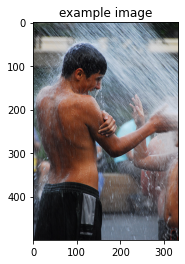

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


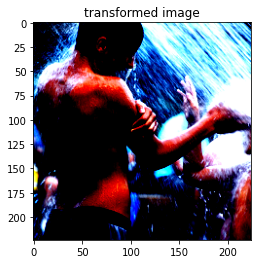

0.5539820905356232
a group of people are hiking up a snowy hill
380    a few people sit together on the snowy mountai...
381    a group of climbers rest on a summit that over...
382     a group of mountain climbers rests at the summit
383    a group of people sitting on top of rocks with...
384               people are sitting on a snowy mountain
Name: caption, dtype: object


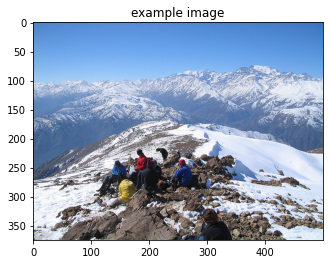

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


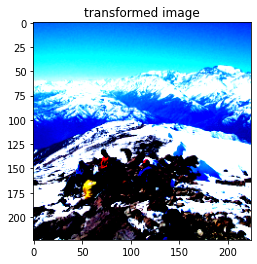

In [ ]:
#after-train
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import random
import numpy as np
model_type="RNN"
# model_type="LSTM"
# random.seed(10000)
# aa=random.randrange(25,100,5)
# n=5
# bb=[]
# bb.extend (aa+i*5 for i in range(n))

pa_list=[125,245,370,375,380]

for index in pa_list:
    path_image=test_loader.dataset.df['path'][index]
    re_cap=test_loader.dataset.df['caption'][index:index+5]


    with open(vocab_path,'rb') as f:
        vocab=pickle.load(f)

    encoder=encoder.eval()
    encoder=encoder.to(device)
    decoder=decoder.to(device)
    image=load_image(path_image,data_transform)
    image_tensor=image.to(device)
    Score=[]

    if model_type == "RNN":
#       encoder_path=os.path.join(model_path,'rencoder-{}-{}.ckpt'.format(5, 230))
      decoder_path=os.path.join(model_path,'rdecoder-{}-{}.ckpt'.format(5, 230))
    else:
#       encoder_path=os.path.join(model_path,'encoder-{}-{}.ckpt'.format(5, 140))
      decoder_path=os.path.join(model_path,'decoder-{}-{}.ckpt'.format(5, 140))


    encoder.load_state_dict(torch.load(encoder_path))
    decoder.load_state_dict(torch.load(decoder_path))


    feature=encoder(image_tensor)
    sampled_ids=decoder.sample(feature)
    sampled_ids=sampled_ids[0].cpu().numpy()

    sampled_predict = []
    for word_id in sampled_ids:
        word = vocab.idx2word[word_id]
        if word =='<start>':
            continue 
        sampled_predict.append(word)
        if word == '<end>':
            break
    sentence = ' '.join(sampled_predict[:-1])
    references=[]
    
    for item in re_cap:
        references.append(str(item).split()) 
    Bleu_score=sentence_bleu(references,sampled_predict,weights=(0.45,0.45,0.05,0.05),smoothing_function=smoothing.method2)
    print(Bleu_score)
    print(sentence)
    print(re_cap)


    image_show=Image.open(path_image)
    plt.imshow(np.asarray(image_show))
    plt.title('example image')
    plt.show()
 

    transformed_image=np.asarray(image)
    transformed_image = np.squeeze(transformed_image)
    transformed_image=transformed_image.transpose((1, 2, 0))
    plt.imshow(transformed_image)
    plt.title('transformed image')
    plt.show()

It is also noticeable that, generally, captions from model CNN-LSTM have higher BELU scores than the paired caption from CNN-RNN model.  


Comparison between decoder RNN and LSTM

### 1. comparison at train 
    
Take 95% of the Flikcr8K as train dataset,  train 128 images for each training step, then there are 301 step in each train process, train both models for 5 epochs. At the beginning, for both models, the loss which measures the error of the captions generated by models comparing with the references are dropping fast, but  CNN-LSTM is faster. As a result,  the loss of LSTM is smaller than RNN, which is displayed in the figure below.  After 5 epochs, the difference between of LSTM and RNN is 0.1538 (loss of RNN – loss of LSTM).  
    
The predicted captions for the sample images in the second section also show the same

conclusion. the prediction of LSTM has higher BELU score, indicating the captions of 

LSTM have higher quality and the model has better quality. 	


### 2. Comparison between decoder RNN and LSTM over test dataset. 

The test dataset contains 405 images, 2025 reference captions, which is 5% of Flikcr8k dataset. Loss and the weighted BELU is the main indicators applied to evaluate the performance of the two decoder.   Over the test dataset, loss and BLEU are calculated image by image, for the whole test dataset, average loss of RNN is 2.7056, while LSTM’s is 2.6046.   Average BLEU of RNN is 0.3583, LSTM’S is 0.3955.  The highest difference of BLEU score between LSTM and RNN is 0.7143.  The plot below displays the difference (LSTM-RNN), there are more data point  above 0, which  shows the difference has more positive value. As a result, LSTM has better  performance. 

In terms of length of predicted caption,  the average length from decoder RNN is 10.12 words for each image, LSTM has longer caption, with 10.36 words on average for each image. To  evaluate performance of both model on difference length of predictions, sort the predicted by the length of captions, rank them from short to long, place them into 10 groups, the first group contains top 10% short captions, the 10th group is the top 10% long captions. Calculate average words used for each caption and average BELU score within each groups.

As we see from the table, rank and group prediction by length, LSTM model generates longer captions than normal RNN overall. Also, no matter short and long captions, LSTM has higher score than RNN.



# Summary

According to the experiment, LSTM has better performance than RNN in term of image caption. This is consistent with the theory. It can be difficult to train standard RNNs to solve problems that require learning long-term temporal dependencies, for example image caption. This is because the gradient of the loss function decays exponentially with time (called the vanishing gradient problem). LSTM networks are a type of RNN that uses special units in addition to standard units. LSTM units include a ‘memory cell’ that can maintain information in memory for long periods of time. A set of gates, input gate, forget gate and output gate, is used to control when information enters the memory, when it‘s output, and when it’s forgotten. Compared to normal RNN, LSTM  is better at solving  longer-term dependencies problems.
